# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *
import seaborn.objects as so

In [ ]:
#| export
import numpy as np
import functools
import collections
from fastcore.basics import patch

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float, d:int=2):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,d))
    
    @functools.cached_property
    def distance_matrix(self):
        a = self.points
        diff = a[:,None,:] - a[None,:,:]
        return np.linalg.norm(diff,axis=-1)

    @functools.cached_property
    def adj(self):
        mask = self.distance_matrix < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}

    def n_comp(self):
        def dfs(gr,s):
            for v in gr[s]:
                if v not in self.parent:
                    self.parent[v]=s
                    dfs(gr,v)
                    self.topo.append(v)
        self.parent = {}
        self.topo=[]
        count = 0
        for i in range(self.n):
            if i not in self.parent:
                count+=1
                self.parent[i]=None
                dfs(self.adj,i)
                self.topo.append(i)
        return count
        
    def degree_distribution(self):
        dgr=collections.Counter([len(v) for _,v in self.adj.items()])
        return np.array(list(dgr.items()))

    def cyclic(self):
        for k, lst in self.adj.items():
            for v in lst:
                if k != self.parent[v] and v!=self.parent[k]: 
                    return True
        return False

    def n_tri(self):
        A = (self.distance_matrix<=self.r).astype(np.int64)
        np.fill_diagonal(A,0)
        return np.trace(np.linalg.matrix_power(A,3))//6


In [ ]:
rgg = RGG(100,0.1)
rgg.distance_matrix

array([[0.        , 0.68322164, 0.8618508 , ..., 0.73970171, 0.63447826,
        0.24001312],
       [0.68322164, 0.        , 0.42815998, ..., 0.20885082, 0.72365535,
        0.44322179],
       [0.8618508 , 0.42815998, 0.        , ..., 0.21949189, 0.52286384,
        0.66194194],
       ...,
       [0.73970171, 0.20885082, 0.21949189, ..., 0.        , 0.59111336,
        0.51289512],
       [0.63447826, 0.72365535, 0.52286384, ..., 0.59111336, 0.        ,
        0.57997656],
       [0.24001312, 0.44322179, 0.66194194, ..., 0.51289512, 0.57997656,
        0.        ]])

In [ ]:
rgg.adj

{0: [26, 43],
 1: [33, 55, 56, 58, 61, 63],
 2: [27, 34, 71],
 3: [18, 36],
 4: [31],
 5: [49, 65],
 6: [24, 50],
 7: [66],
 8: [65, 85],
 9: [28, 44, 54, 81],
 10: [33, 51, 52, 55, 63, 74],
 11: [23, 70],
 12: [16, 89],
 13: [17, 31],
 14: [73, 80],
 15: [69, 86],
 16: [12, 18, 44],
 17: [13, 31],
 18: [3, 16, 36, 44, 54],
 19: [45],
 20: [],
 21: [47, 62, 76, 87],
 22: [29, 35, 67, 79],
 23: [11, 30, 75, 93],
 24: [6, 50],
 25: [38, 53],
 26: [0, 43],
 27: [2, 34, 71],
 28: [9, 44, 54, 81, 95],
 29: [22, 35, 67, 73],
 30: [23, 75, 93],
 31: [4, 13, 17],
 32: [41, 88],
 33: [1, 10, 55, 58, 63],
 34: [2, 27, 69],
 35: [22, 29, 67],
 36: [3, 18],
 37: [72],
 38: [25, 53],
 39: [47, 78, 90, 92],
 40: [47],
 41: [32, 88],
 42: [],
 43: [0, 26, 50],
 44: [9, 16, 18, 28, 54, 81],
 45: [19, 57],
 46: [83, 94],
 47: [21, 39, 40, 92],
 48: [85, 96],
 49: [5, 61],
 50: [6, 24, 43, 77],
 51: [10, 74],
 52: [10, 56],
 53: [25, 38],
 54: [9, 18, 28, 44, 81, 95],
 55: [1, 10, 33, 56, 58, 63],
 56: 

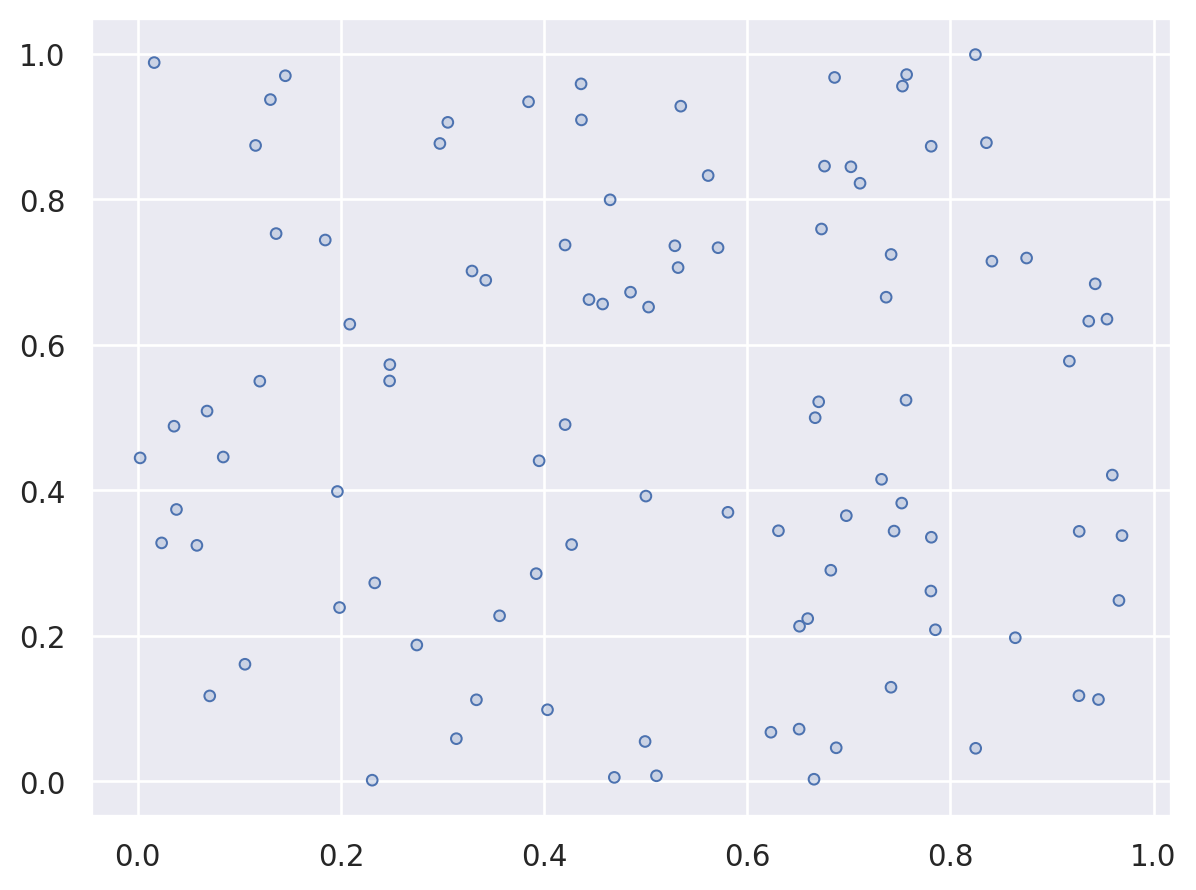

In [ ]:

p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
rgg.n_comp()

17

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 2, 38],
       [ 6,  5],
       [ 3, 18],
       [ 1, 16],
       [ 4, 13],
       [ 5,  6],
       [ 0,  4]])

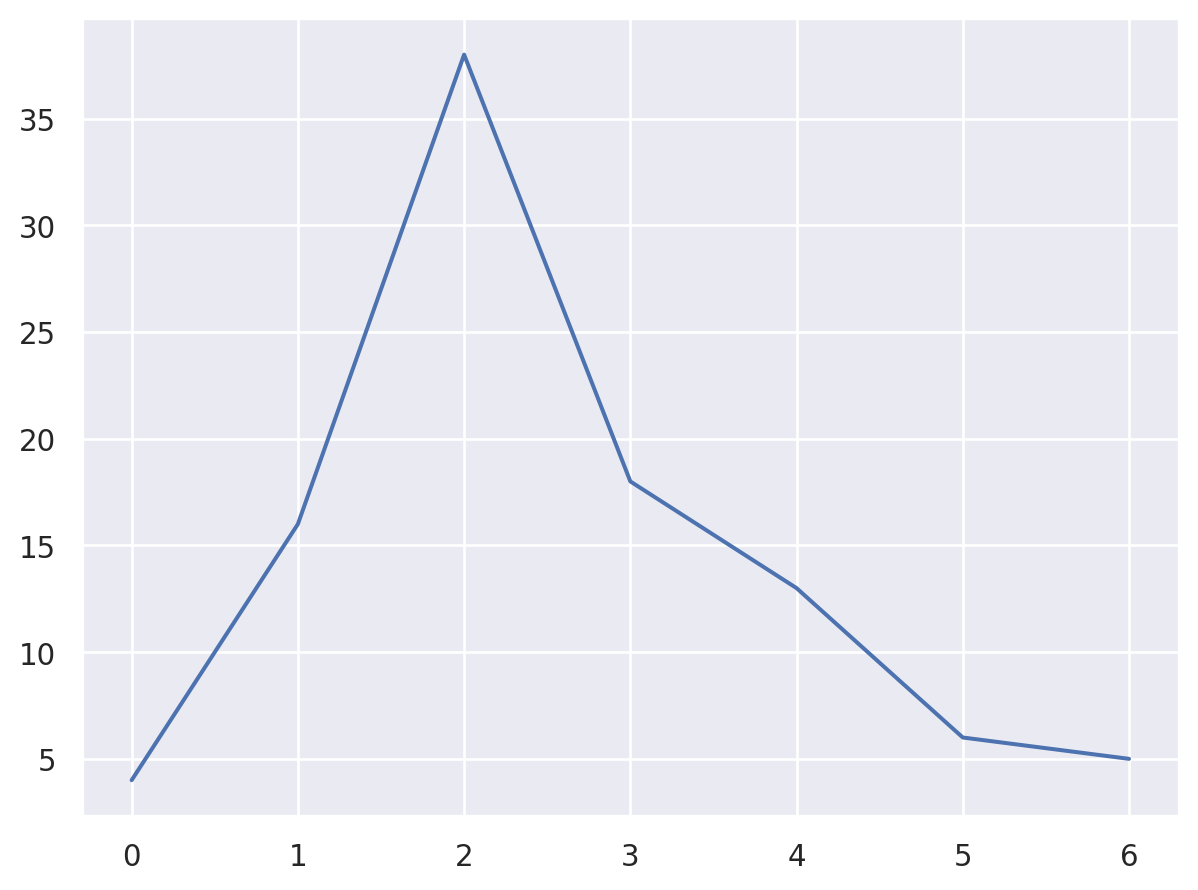

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
rgg.cyclic()

True

In [ ]:
rgg.n_tri()

58

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()